In [ ]:
!cp /content/drive/MyDrive/capstone/P1E_S1.zip /content
!cp /content/drive/MyDrive/capstone/P1E_S2.zip /content
!cp /content/drive/MyDrive/capstone/P1E_S3.zip /content

!cp /content/drive/MyDrive/capstone/P1E_S1_masked.zip /content
!cp /content/drive/MyDrive/capstone/P1E_S2_masked.zip /content
!cp /content/drive/MyDrive/capstone/P1E_S3_masked.zip /content

In [ ]:
!unzip /content/P1E_S1.zip
!unzip /content/P1E_S2.zip
!unzip /content/P1E_S3.zip

!unzip /content/P1E_S1_masked.zip
!unzip /content/P1E_S2_masked.zip
!unzip /content/P1E_S3_masked.zip

!mv /content/content/* /content
!rm -r /content/content

Streaming output truncated to the last 5000 lines.
  inflating: P1E_S2/cam2/Person3/img622_579.jpg  
  inflating: P1E_S2/cam2/Person3/img623_579.jpg  
  inflating: P1E_S2/cam2/Person3/img624_579.jpg  
  inflating: P1E_S2/cam2/Person3/img625_579.jpg  
  inflating: P1E_S2/cam2/Person3/img626_579.jpg  
  inflating: P1E_S2/cam2/Person3/img627_579.jpg  
  inflating: P1E_S2/cam2/Person3/img628_579.jpg  
  inflating: P1E_S2/cam2/Person3/img629_579.jpg  
  inflating: P1E_S2/cam2/Person3/img630_579.jpg  
  inflating: P1E_S2/cam2/Person3/img631_579.jpg  
  inflating: P1E_S2/cam2/Person3/img632_579.jpg  
  inflating: P1E_S2/cam2/Person3/img633_579.jpg  
  inflating: P1E_S2/cam2/Person3/img634_579.jpg  
  inflating: P1E_S2/cam2/Person3/img635_579.jpg  
   creating: P1E_S2/cam2/Person4/
  inflating: P1E_S2/cam2/Person4/img164_163.jpg  
  inflating: P1E_S2/cam2/Person4/img165_163.jpg  
  inflating: P1E_S2/cam2/Person4/img166_163.jpg  
  inflating: P1E_S2/cam2/Person4/img167_163.jpg  
  inflating: P1

In [ ]:
# !rm -r /content/P1E_S3
# !rm -r /content/train
# !rm -r /content/validate
# !rm -r /content/test
# !unzip /content/masked.zip
# !mkdir /content/abc
# !cp -r /content/content/MaskTheFace/test/_masked /content/abc
# !rm -r /content/abc/_masked/_masked

In [ ]:
import random
import os
from pathlib import Path

!rm -r /content/train
!rm -r /content/validate
!rm -r /content/test

!mkdir /content/train
!mkdir /content/validate
!mkdir /content/test

for i in range(1,27):
  os.mkdir("/content/train/Person"+str(i))
  os.mkdir("/content/validate/Person"+str(i))
  os.mkdir("/content/test/Person"+str(i))


rm: cannot remove '/content/train': No such file or directory
rm: cannot remove '/content/validate': No such file or directory
rm: cannot remove '/content/test': No such file or directory


In [ ]:
root = "/content/P1E_S3/"
for cam in os.listdir(root):
  for person in os.listdir(root+cam):
    images = os.listdir(root+cam+'/'+person+'/')
    random.shuffle(images)
    
    for i in range(round(len(images)*0.6)):
      Path(root+cam+'/'+person+'/'+images[i]).rename("/content/train/" + person+'/'+images[i])
    
    for i in range(round(len(images)*0.6),round(len(images)*0.9)):
      Path(root+cam+'/'+person+'/'+images[i]).rename("/content/validate/" + person+'/'+images[i])
    
    for i in range(round(len(images)*0.9),len(images)):
      Path(root+cam+'/'+person+'/'+images[i]).rename("/content/test/" + person+'/'+images[i])


In [ ]:
import cv2
import numpy as np
import os

x_train = []
y_train = []
x_validate  = []
y_validate  = []
x_test  = []
y_test  = []

for person in os.listdir("/content/train/"):
  for img in os.listdir("/content/train/"+person):
    im_data = cv2.imread("/content/train/"+person+'/'+img,3)
    im_data = cv2.resize(im_data, (48,48))
    x_train.append(np.array(im_data))
    y_train.append(np.array([int(person[6:])-1]))

for person in os.listdir("/content/validate/"):
  for img in os.listdir("/content/validate/"+person):
    im_data = cv2.imread("/content/validate/"+person+'/'+img,3)
    im_data = cv2.resize(im_data, (48,48))
    x_validate.append(np.array(im_data))
    y_validate.append(np.array([int(person[6:])-1]))

for person in os.listdir("/content/test/"):
  for img in os.listdir("/content/test/"+person):
    im_data = cv2.imread("/content/test/"+person+'/'+img,3)
    im_data = cv2.resize(im_data, (48,48))
    x_test.append(np.array(im_data))
    y_test.append(np.array([int(person[6:])-1]))

In [ ]:
X_train=np.array(x_train)
Y_train=np.array(y_train)

X_validate=np.array(x_validate)
Y_validate=np.array(y_validate)

X_test=np.array(x_test)
Y_test=np.array(y_test)

In [ ]:
# We first load the necessary libraries, the dataset and reshape its dimensons to the minimum allowed by the VGG16 --> (48,48,3)
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import VGG16, ResNet50
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
input_shape = (48, 48, 3)
# input_shape = (224, 224, 3)

# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(Y_train)
Y_validate = to_categorical(Y_validate)

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize test set
X_validate_resized = []
for img in X_validate:
  X_validate_resized.append(np.resize(img, input_shape) / 255)
  
X_validate_resized = np.array(X_validate_resized)
print(X_validate_resized.shape)

(5802, 48, 48, 3)
(2914, 48, 48, 3)


In [ ]:
# from google.colab.patches import cv2_imshow
# # t = cv2.resize(X_train_resized[2],(224,224))
# cv2_imshow(X_train[1])
# # # Y_test[2]

In [ ]:
Y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# We build the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [ ]:
# We freeze every layer in our base model so that they do not train, we want that our feature extractor stays as before --> transfer learning
for layer in base_model.layers: 
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')
# We take the last layer of our the model and add it to our classifier
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(26, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)
# We compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Layer input_1 frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Layer block3_conv1 frozen.
Layer block3_conv2 frozen.
Layer block3_conv3 frozen.
Layer block3_pool frozen.
Layer block4_conv1 frozen.
Layer block4_conv2 frozen.
Layer block4_conv3 frozen.
Layer block4_pool frozen.
Layer block5_conv1 frozen.
Layer block5_conv2 frozen.
Layer block5_conv3 frozen.
Layer block5_pool frozen.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
____________________

In [ ]:
# We start the training
epochs = 15
batch_size = 256
# We train it
r = model.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_data=(X_validate_resized, Y_validate),
          epochs=epochs)

Epoch 1/15
23/23 [==============================] - 177s 8s/step - loss: 2.8730 - accuracy: 0.2092 - val_loss: 1.6397 - val_accuracy: 0.6616
Epoch 2/15
23/23 [==============================] - 175s 8s/step - loss: 1.4847 - accuracy: 0.6681 - val_loss: 0.9346 - val_accuracy: 0.8037
Epoch 3/15
23/23 [==============================] - 176s 8s/step - loss: 0.8619 - accuracy: 0.8169 - val_loss: 0.6206 - val_accuracy: 0.8758
Epoch 4/15
23/23 [==============================] - 176s 8s/step - loss: 0.5960 - accuracy: 0.8719 - val_loss: 0.4601 - val_accuracy: 0.9128
Epoch 5/15
23/23 [==============================] - 175s 8s/step - loss: 0.4244 - accuracy: 0.9142 - val_loss: 0.3651 - val_accuracy: 0.9296
Epoch 6/15
23/23 [==============================] - 175s 8s/step - loss: 0.3343 - accuracy: 0.9334 - val_loss: 0.2999 - val_accuracy: 0.9423
Epoch 7/15
23/23 [==============================] - 175s 8s/step - loss: 0.2596 - accuracy: 0.9534 - val_loss: 0.2594 - val_accuracy: 0.9513
Epoch 8/15
23

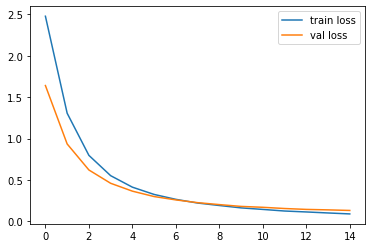

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

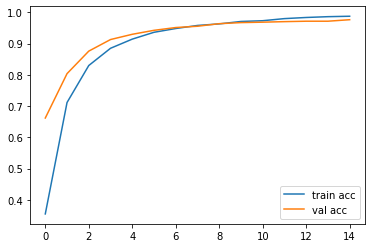

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('new_VGG16.h5')
# model = load_model('VGG16.h5')

# admin

In [ ]:
!cp /content/drive/MyDrive/capstone/VGG16.h5 /content

In [ ]:
from keras.models import load_model
model = load_model('/content/VGG16.h5')

In [ ]:
from keras.models import Model
import numpy as np

# save the original weights
weights_bak = model.layers[-1].get_weights()
nb_classes = model.layers[-1].output_shape[-1]
# print(len(weights_bak[1]))
model.layers.pop()
# model.summary()
# print("--------------------")
new_layer = Dense(nb_classes + 1, activation='softmax')
out = new_layer(model.layers[-2].output)
inp = model.input
model = Model(inp, out)
model.summary()
weights_new = model.layers[-1].get_weights()

# copy the original weights back
weights_new[0][:, :-1] = weights_bak[0]
weights_new[1][:-1] = weights_bak[1]

# use the average weight to init the new class.
weights_new[0][:, -1] = np.mean(weights_bak[0], axis=1)
weights_new[1][-1] = np.mean(weights_bak[1])

model.layers[-1].set_weights(weights_new)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# We start the training
epochs = 10
batch_size = 256
# We train it
r = model.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_data=(X_validate_resized, Y_validate),
          epochs=epochs)

Epoch 1/10
6/6 [==============================] - 53s 9s/step - loss: 0.1546 - accuracy: 0.9734 - val_loss: 0.1116 - val_accuracy: 0.9816
Epoch 2/10
6/6 [==============================] - 51s 9s/step - loss: 0.1224 - accuracy: 0.9793 - val_loss: 0.0883 - val_accuracy: 0.9869
Epoch 3/10
6/6 [==============================] - 51s 9s/step - loss: 0.0792 - accuracy: 0.9911 - val_loss: 0.0831 - val_accuracy: 0.9856
Epoch 4/10
6/6 [==============================] - 51s 9s/step - loss: 0.0607 - accuracy: 0.9977 - val_loss: 0.0682 - val_accuracy: 0.9895
Epoch 5/10
6/6 [==============================] - 51s 9s/step - loss: 0.0550 - accuracy: 0.9962 - val_loss: 0.0637 - val_accuracy: 0.9895
Epoch 6/10
6/6 [==============================] - 51s 9s/step - loss: 0.0461 - accuracy: 0.9973 - val_loss: 0.0617 - val_accuracy: 0.9895
Epoch 7/10
6/6 [==============================] - 51s 9s/step - loss: 0.0416 - accuracy: 0.9993 - val_loss: 0.0564 - val_accuracy: 0.9882
Epoch 8/10
6/6 [==================

# Evaluate

In [ ]:
Y_test = to_categorical(Y_test)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)
Y_test.shape

(972, 48, 48, 3)


(972, 26)

In [ ]:
# We evaluate the accuracy and the loss in the test set
scores = model.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

31/31 [==============================] - 20s 654ms/step - loss: 0.0995 - accuracy: 0.9835
Test loss: 0.09950930625200272
Test accuracy: 0.9835391044616699


In [ ]:
# y_pred=model.predict_classes(test_images)
# con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

In [ ]:
!cp /content/new_VGG16.h5 /content/drive/MyDrive/capstone

# test single image

In [ ]:
import cv2
im = cv2.imread("/content/test/Person25/img1003_963.jpg")
im = cv2.resize(im,(48,48))
im = np.array(im)
im = np.resize(im,input_shape)/255

temp = [im]
temp = np.array(temp)

# temp.shape
# np.array()

match = model.predict(temp)
match = np.argmax(match)
match

24

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/P1E_S3.zip /content/drive/MyDrive/capstone/

In [ ]:
# from keras.models import load_model
# mo = load_model('/content/VGG16.h5')

# asda

In [ ]:
!git clone https://github.com/aqeelanwar/MaskTheFace.git

Cloning into 'MaskTheFace'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3125 (delta 0), reused 0 (delta 0), pack-reused 3122
Receiving objects: 100% (3125/3125), 235.03 MiB | 21.21 MiB/s, done.
Resolving deltas: 100% (250/250), done.


In [ ]:
!cd /content/MaskTheFace
!ls
!pip install -r /content/MaskTheFace/requirements.txt

MaskTheFace  P1E_S2  P1E_S2.zip  sample_data  test  train
     |████████████████████████████████| 163kB 11.0MB/s 
     |████████████████████████████████| 3.2MB 18.6MB/s 
     |████████████████████████████████| 100.2MB 56kB/s 
     |████████████████████████████████| 20.2MB 1.2MB/s 
     |████████████████████████████████| 28.2MB 99kB/s 
     |████████████████████████████████| 2.1MB 58.0MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for dlib: filename=dlib-19.19.0-cp37-cp37m-linux_x86_64.whl size=3888215 sha256=6bd4ed364aa4520131b05b2a2f794a77d2050cb942d9be246a84211f1107fb72
  Stored in directory: /root/.cache/pip/wheels/96/ac/11/8aadec62cb4fb5b264a9b1b042caf415de9a75f5e165d79a51
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=b8698ea178194575d541d1c9567cd862ce2cf94838b731ad89f81ffb0be9e103
  Stored in directory: /root/.cache/pip

In [ ]:
!python /content/MaskTheFace/mask_the_face.py --path '/content/00001812.jpg' --mask_type 'N95' --verbose --write_original_image

Traceback (most recent call last):
  File "/content/MaskTheFace/mask_the_face.py", line 7, in <module>
    from utils.aux_functions import *
  File "/content/MaskTheFace/utils/aux_functions.py", line 9, in <module>
    from content.MaskTheFace.utils.read_cfg import read_cfg
ModuleNotFoundError: No module named 'content'


# temp

In [ ]:
!wget https://zenodo.org/record/815657/files/P2L_S1.tar.xz

--2021-04-04 10:30:04--  https://zenodo.org/record/815657/files/P2L_S1.tar.xz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 744449136 (710M) [application/octet-stream]
Saving to: ‘P2L_S1.tar.xz’

P2L_S1.tar.xz       100%[===================>] 709.96M  6.64MB/s    in 2m 57s  

2021-04-04 10:33:02 (4.02 MB/s) - ‘P2L_S1.tar.xz’ saved [744449136/744449136]



In [ ]:
!tar -xf P2L_S1.tar.xz 

In [ ]:
!tar -xf P2L_S1_C1.tar.xz 